In [1]:
import tensorflow as tf
import numpy as np
import datetime
import random
from sklearn.model_selection import train_test_split

from data.generator import generateDataSetZ, saveDataSet, timedDataSet

# Load the TensorBoard notebook extension
%load_ext tensorboard

2023-01-06 12:27:03.562532: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  SSE3 SSE4.1 SSE4.2 AVX AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


In [2]:
input1, output1, mean1, std1 = generateDataSetZ("./datasets/raw/logs_WT.csv", 
                                "./datasets/raw/Resultaten_WT.csv", 
                                datetime.datetime(2020, 9, 15, 0, 0).timestamp(), 
                                datetime.datetime(2021, 2, 10, 0, 0).timestamp(),
                                100)

input2, output2, mean2, std2 = generateDataSetZ("./datasets/raw/logs_DN.csv", 
                                "./datasets/raw/Resultaten_DN.csv", 
                                datetime.datetime(2020, 9, 15, 0, 0).timestamp(), 
                                datetime.datetime(2021, 2, 10, 0, 0).timestamp(),
                                100)

input3, output3, mean3, std3 = generateDataSetZ("./datasets/raw/logs_RS.csv", 
                                "./datasets/raw/Resultaten_RS.csv", 
                                datetime.datetime(2021, 2, 1, 0, 0).timestamp(), 
                                datetime.datetime(2021, 6, 30, 0, 0).timestamp(),
                                100)

input4, output4, mean4, std4 = generateDataSetZ("./datasets/raw/logs_KW1.csv", 
                                "./datasets/raw/Resultaten_KW1.csv", 
                                datetime.datetime(2021, 2, 1, 0, 0).timestamp(), 
                                datetime.datetime(2021, 6, 30, 0, 0).timestamp(),
                                100)

input5, output5, mean5, std5 = generateDataSetZ("./datasets/raw/logs_KW2.csv", 
                                "./datasets/raw/Resultaten_KW1.csv", 
                                datetime.datetime(2020, 9, 15, 0, 0).timestamp(), 
                                datetime.datetime(2021, 2, 10, 0, 0).timestamp(),
                                100)

input6, output6, mean6, std6 = generateDataSetZ("./datasets/raw/logs_WT_2.csv", 
                                "./datasets/raw/Resultaten_WT_2.csv", 
                                datetime.datetime(2020, 9, 15, 0, 0).timestamp(), 
                                datetime.datetime(2021, 2, 10, 0, 0).timestamp(),
                                100)

seed1 = random.randrange(0,100)
seed2 = random.randrange(0,100)
seed3 = random.randrange(0,100)
seed4 = random.randrange(0,100)
seed5 = random.randrange(0,100)
seed6 = random.randrange(0,100)

random.Random(seed1).shuffle(input1)
random.Random(seed1).shuffle(output1)

random.Random(seed2).shuffle(input2)
random.Random(seed2).shuffle(output2)

random.Random(seed3).shuffle(input3)
random.Random(seed3).shuffle(output3)

random.Random(seed4).shuffle(input4)
random.Random(seed4).shuffle(output4)

random.Random(seed5).shuffle(input5)
random.Random(seed5).shuffle(output5)

random.Random(seed6).shuffle(input6)
random.Random(seed6).shuffle(output6)

In [3]:
max_length = min([len(output1),len(output2),len(output3),len(output4),len(output5),len(output6)])
print(max_length)

input = []
output = []

input.extend(input1[0:max_length])
output.extend(output1[0:max_length])

input.extend(input2[0:max_length])
output.extend(output2[0:max_length])

input.extend(input3[0:max_length])
output.extend(output3[0:max_length])

input.extend(input4[0:max_length])
output.extend(output4[0:max_length])

input.extend(input5[0:max_length])
output.extend(output5[0:max_length])

x = np.array(input)
y = np.array(output)

9700


In [ ]:
np.array(input1).shape
print(input1[0])

In [4]:
x_train, x_test, y_train, y_test = train_test_split(x, y)

print(max_length)
print(len(x_train))
print(len(x_test))

9700
36375
12125


In [5]:
model = tf.keras.models.Sequential([
    tf.keras.layers.Flatten(input_shape=(np.array(input1).shape[1], 1)),
    tf.keras.layers.Dense(2048, activation='relu'),
    tf.keras.layers.Dense(1024, activation='relu'),
    tf.keras.layers.Dense(512,  activation='relu'),
    tf.keras.layers.Dense(64,   activation='relu'),
    tf.keras.layers.Dense(32,   activation='relu'),
    tf.keras.layers.Dense(16,   activation='relu'),
    tf.keras.layers.Dense(1),
])

model.summary()

model.compile(optimizer=tf.optimizers.Adam(), loss='huber', metrics=['mse', 'mae', 'mape'])

2023-01-02 15:54:26.875459: I tensorflow/compiler/xla/stream_executor/cuda/cuda_gpu_executor.cc:981] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2023-01-02 15:54:26.915081: I tensorflow/compiler/xla/stream_executor/cuda/cuda_gpu_executor.cc:981] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2023-01-02 15:54:26.915285: I tensorflow/compiler/xla/stream_executor/cuda/cuda_gpu_executor.cc:981] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2023-01-02 15:54:26.915796: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  SSE3 SSE4.1 SSE4.2 AVX AVX2 FMA
To enable them in other oper

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten (Flatten)           (None, 14)                0         
                                                                 
 dense (Dense)               (None, 2048)              30720     
                                                                 
 dense_1 (Dense)             (None, 1024)              2098176   
                                                                 
 dense_2 (Dense)             (None, 512)               524800    
                                                                 
 dense_3 (Dense)             (None, 64)                32832     
                                                                 
 dense_4 (Dense)             (None, 32)                2080      
                                                                 
 dense_5 (Dense)             (None, 16)                5

In [6]:
log_dir = "logs/Z/" + datetime.datetime.now().strftime("%Y%m%d-%H%M%S")
tensorboard_callback = tf.keras.callbacks.TensorBoard(log_dir=log_dir, histogram_freq=1)
model.fit(x_train, y_train, epochs=300, callbacks=[tensorboard_callback], initial_epoch=0)
model.save("models/Z.h5")

Epoch 1/300


2023-01-02 15:54:30.094880: I tensorflow/compiler/xla/service/service.cc:173] XLA service 0x559530e8fd60 initialized for platform CUDA (this does not guarantee that XLA will be used). Devices:
2023-01-02 15:54:30.094902: I tensorflow/compiler/xla/service/service.cc:181]   StreamExecutor device (0): NVIDIA GeForce GTX 1050 Ti with Max-Q Design, Compute Capability 6.1
2023-01-02 15:54:30.099693: I tensorflow/compiler/mlir/tensorflow/utils/dump_mlir_util.cc:268] disabling MLIR crash reproducer, set env var `MLIR_CRASH_REPRODUCER_DIRECTORY` to enable.
2023-01-02 15:54:30.099981: I tensorflow/core/common_runtime/process_util.cc:146] Creating new thread pool with default inter op setting: 2. Tune using inter_op_parallelism_threads for best performance.
2023-01-02 15:54:30.193221: I tensorflow/tsl/platform/default/subprocess.cc:304] Start cannot spawn child process: No such file or directory
2023-01-02 15:54:30.257919: I tensorflow/compiler/jit/xla_compilation_cache.cc:477] Compiled cluster u

1137/1137 [==============================] - 11s 6ms/step - loss: 0.3833 - mse: 0.8610 - mae: 0.7966 - mape: 307.8885
Epoch 2/300
1137/1137 [==============================] - 5s 4ms/step - loss: 0.3672 - mse: 0.8117 - mae: 0.7802 - mape: 309.8600
Epoch 3/300
1137/1137 [==============================] - 5s 5ms/step - loss: 0.3609 - mse: 0.7996 - mae: 0.7705 - mape: 312.8166
Epoch 4/300
1137/1137 [==============================] - 5s 4ms/step - loss: 0.3555 - mse: 0.7872 - mae: 0.7638 - mape: 323.3960
Epoch 5/300
1137/1137 [==============================] - 5s 4ms/step - loss: 0.3525 - mse: 0.7819 - mae: 0.7578 - mape: 324.4132
Epoch 6/300
1137/1137 [==============================] - 5s 4ms/step - loss: 0.3460 - mse: 0.7676 - mae: 0.7474 - mape: 325.9877
Epoch 7/300
1137/1137 [==============================] - 5s 4ms/step - loss: 0.3386 - mse: 0.7499 - mae: 0.7346 - mape: 340.9936
Epoch 8/300
1137/1137 [==============================] - 5s 4ms/step - loss: 0.3329 - mse: 0.7364 - mae: 0.7

In [ ]:
loss, mse, mae, mape = model.evaluate(x_test, y_test)

In [5]:
model = tf.keras.models.load_model("models/Z.h5")

2023-01-06 12:27:54.193723: I tensorflow/compiler/xla/stream_executor/cuda/cuda_gpu_executor.cc:981] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2023-01-06 12:27:54.319643: I tensorflow/compiler/xla/stream_executor/cuda/cuda_gpu_executor.cc:981] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2023-01-06 12:27:54.319889: I tensorflow/compiler/xla/stream_executor/cuda/cuda_gpu_executor.cc:981] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2023-01-06 12:27:54.323165: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  SSE3 SSE4.1 SSE4.2 AVX AVX2 FMA
To enable them in other oper

In [6]:
y_p = np.array(model.predict(x_test))
y_m = np.array(y_test)
acc = 1 - np.mean(np.abs( (y_p - y_m) / y_m ))
print(acc)

379/379 [==============================] - 1s 1ms/step
-1.4605926233941653


0.21250491
0.5725665
0.1350212264593624
0.9159696767424845


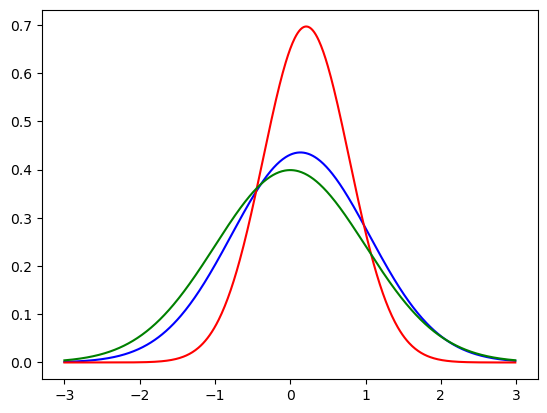

In [8]:
import matplotlib.pyplot as plt
from scipy.stats import norm, gaussian_kde

mean_p = np.mean(y_p)
std_p = np.std(y_p)

print(mean_p)
print(std_p)

mean_e = np.mean(y_test)
std_e = np.std(y_test)

print(mean_e)
print(std_e)

x_axis = np.arange(-3, 3, 0.01)
plt.plot(x_axis, norm.pdf(x_axis, mean_e, std_e), color="blue")
plt.plot(x_axis, norm.pdf(x_axis, mean_p, std_p), color="red")
plt.plot(x_axis, norm.pdf(x_axis, 0, 1), color="green")

In [14]:
vals = [[std1, mean1, input1, output1],[std2, mean2, input2, output2],[std3, mean3, input3, output3],[std4, mean4, input4, output4],[std5, mean5, input5, output5],[std6, mean6, input6, output6]]

acc = []
for val in vals:    
    std_wt = val[0]
    mean_wt = val[1]
    y_wt = model.predict(np.array(val[2]))
    y_wt_e = np.array(val[3])


    y_wt = np.round(y_wt * std_wt + mean_wt)
    y_wt_e = np.round(y_wt_e * std_wt + mean_wt)


    acc.append(np.sum(y_wt == y_wt_e)/len(output2))
print(acc)
#plt.plot([0.66 for i in range(len(vals))])

991/991 [==============================] - 1s 1ms/step
[0.45870090634441085, 0.6308459214501511, 0.4031722054380665, 0.16287009063444108, 0.13595166163141995, 0.5942598187311178]


Text(0.5, 1.0, 'Accuracy per Course')

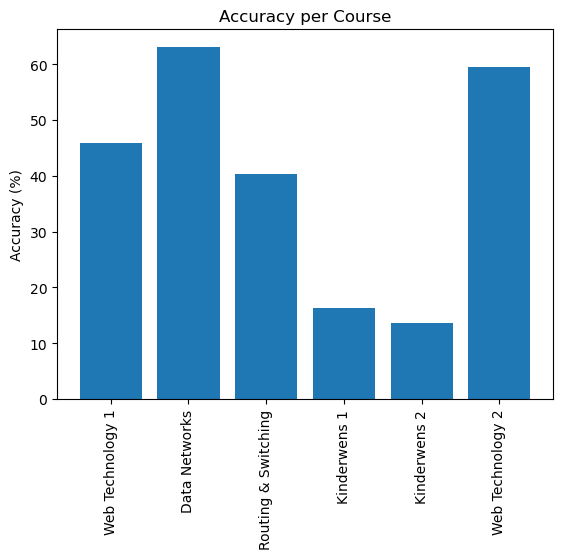

In [29]:
plt.bar([i for i in range(6)],np.array(acc) * 100)
#plt.plot([i for i in range(6)], [66 for i in range(6)], color="orange")
plt.xticks([i for i in range(6)], 
           ["Web Technology 1", "Data Networks", "Routing & Switching", "Kinderwens 1", "Kinderwens 2", "Web Technology 2"],
          rotation="vertical")
plt.ylabel("Accuracy (%)")
plt.title("Accuracy per Course")
